# Introduction to programming for Geoscientists through Python

# Lecture 5 solutions
## [Gerard J. Gorman (g.gorman@imperial.ac.uk)](http://www.imperial.ac.uk/people/g.gorman), [Nicolas Barral (n.barral@imperial.ac.uk)](http://www.imperial.ac.uk/people/n.barral)

* **Fill lists with function values**</br>
A function with many applications in science is defined as:</br></br>
$h(x) = \frac{1}{\sqrt{2\pi}}\exp(-0.5x^2)$</br></br>
Fill lists *xlist* and *hlist* with *x* and *h(x)* values for uniformly spaced *x* coordinates in [−4, 4]. You may adapt the first example in the lecture 4 notes.

In [1]:
from math import *

# Function h(x)
def h(x):
    return (1.0/sqrt(2*pi)) * exp(-0.5 * x**2)

# Generate n points in [-4,4]
n = 9 # number of uniformly distributed points in xlist
dx = 8.0/(n-1) # x spacing
xlist = [-4.0+i*dx for i in range(n)] # Python lists

ylist = [h(x) for x in xlist]

print('xlist =', xlist)
print('ylist =', ylist)

xlist = [-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ylist = [0.00013383022576488537, 0.0044318484119380075, 0.05399096651318806, 0.24197072451914337, 0.3989422804014327, 0.24197072451914337, 0.05399096651318806, 0.0044318484119380075, 0.00013383022576488537]


* **Fill arrays; loop version**</br>
The aim is to fill two arrays *x* and *y* with *x* and *h(x)* values, respectively, where *h(x)* is defined above. Let the *x* values be uniformly spaced in [−4, 4]. Use list comprehensions to create the *x* and *y* arrays.

In [2]:
from math import *
from numpy import *

# Function h(x)
def h(x):
    return (1.0/sqrt(2*pi)) * exp(-0.5 * x**2)

# Generate n points in [-4,4]
n = 9 # number of uniformly distributed points in x
dx = 8.0/(n-1) # x spacing
x = array([-4.0+i*dx for i in range(n)]) # list created using list comprehension and then converted to an array using the array function

y = array([h(xi) for xi in x]) # 

print('x =', x) # x is an array
print('y =', y) # y is an array = h(x)

x = [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
y = [  1.33830226e-04   4.43184841e-03   5.39909665e-02   2.41970725e-01
   3.98942280e-01   2.41970725e-01   5.39909665e-02   4.43184841e-03
   1.33830226e-04]


* **Fill arrays; vectorized version**</br>
Vectorize the code in the previous exercise by creating the *x* values using the *linspace* function and by evaluating *h(x)* for an array argument.

In [3]:
from math import *
from numpy import *

# Function h(x)
def h(x):
    return (1.0/sqrt(2*pi)) * exp(-0.5 * x**2)

# Generate n points in [-4,4]
n = 9
x = linspace(-4.0, 4.0, n)

y = h(x)

print('x =', x) # x is an array
print('y =', y) # y is an array = h(x)

x = [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
y = [  1.33830226e-04   4.43184841e-03   5.39909665e-02   2.41970725e-01
   3.98942280e-01   2.41970725e-01   5.39909665e-02   4.43184841e-03
   1.33830226e-04]


* **Apply a function to a vector**</br>
Given a vector $v = (2, 3, −1)$ and a function $f(x) = x^3 + xe^x + 1$, apply $f$ to each element in $v$. Then calculate $f(v)$ as $v^3 + ve^v + 1$ using vector computing rules. Show that the two results are equal.

In [4]:
from math import *
from numpy import *

# Function f(x)
def f(x):
    return x**3 + x*exp(x) + 1.0

v = array([2.,3.,-1.]) # vector v

# applying function f(x) on each element of v
y1 = f(v[0]) 
y2 = f(v[1])
y3 = f(v[2])

# applying f(x) on v
y = f(v)

print('v =', v)
print('f(v) element-wise = ', y1, y2, y3)
print('f(v) = ', y)

v = [ 2.  3. -1.]
f(v) element-wise =  23.7781121979 88.2566107696 -0.367879441171
f(v) =  [ 23.7781122   88.25661077  -0.36787944]


* **Simulate by hand a vectorized expression**</br>
Suppose *x* and *t* are two arrays of the same length, entering a vectorized expression:

```python
y = cos(sin(x)) + exp(1/t)
```

If *x* holds two elements, 0 and 2, and *t* holds the elements 1 and 1.5, calculate by hand (using a calculator) the *y* array. Thereafter, write a program that mimics the series of computations you did by hand (use explicit loops, but at the end you can use NumPy functionality to check the results).

In [5]:
from math import *
from numpy import *

# Function f(x,t)
def f(x,t):
    return cos(sin(x)) + exp(1.0/t)

# Defining x and t arrays
x=array([0.,2.])
t=array([1.,1.5])

# calculating y1 explicitly
y1=zeros(len(x))
for i in range(len(x)):
    y1[i] = f(x[i],t[i])

# calculating y directly using vectorization feature of numpy
y2=f(x,t) # y2 is an array
print('y1 = ', y1)
print('y2 = ', y2)

y1 =  [ 3.71828183  2.56203432]
y2 =  [ 3.71828183  2.56203432]


* **Demonstrate array slicing**</br>
Create an array *w* with values 0, 0.1, 0.2, ..., 3. Write out *w[:]*, *w[:-2]*, *w[::5]*, *w[2:-2:6]*. Convince yourself in each case that you understand which elements of the array are printed.

In [6]:
from numpy import *

w=arange(0,3.1,0.1) # creates the array starting at 0, ending at (but not containing) 3.1, with a step size of 0.1

print('w[:] =', w[:])
print('w[:-2] =', w[:-2])
print('w[::5] =', w[::5])
print('w[2:-2:6] =', w[2:-2:6])

w[:] = [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3. ]
w[:-2] = [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8]
w[::5] = [ 0.   0.5  1.   1.5  2.   2.5  3. ]
w[2:-2:6] = [ 0.2  0.8  1.4  2.   2.6]


* **Plot a formula**</br>
Make a plot of the function $y(t) = v_0t − 0.5gt^2$ for $v_0 = 10$, $g = 9.81$, and $t \in [0, 2v_0/g]$. The label on the *x* axis should be 'time (s)' and the label on the *y* axis should be 'height (m)'.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


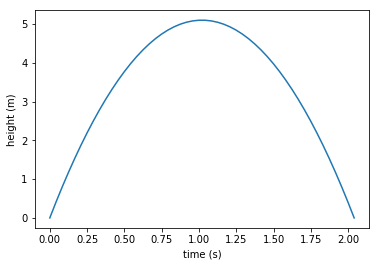

In [7]:
%pylab inline

v0=10.
g=9.81

n=50 # number of points to be plotted on the graph
t=linspace(0,2*v0/g,n) # generate n points between 0 and 2*v0/g
y=v0*t - 0.5*g*t**2

plot(t,y)
xlabel('time (s)')
ylabel('height (m)')
show()


* **Specify the x and y axes**</br>
Extend the program from the previous exercise such that the minimum and maximum *x* and *y* values are computed, and use the extreme values to specify the extent of the *x* and *y* axes. Add some space above the heighest curve.

Populating the interactive namespace from numpy and matplotlib


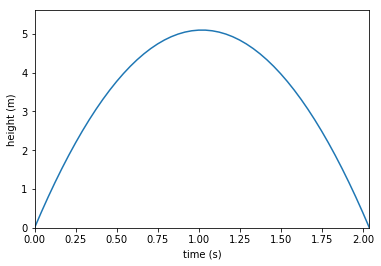

In [8]:
%pylab inline

v0=10.
g=9.81

n=50 # number of points to be plotted on the graph
t=linspace(0,2*v0/g,n) # generate n points between 0 and 2*v0/g
y=v0*t - 0.5*g*t**2

#find minimum and maximum t and y values
tmin = min(t)
tmax = max(t)
ymin = min(y)
ymax = max(y)

# plot graph
plot(t,y)
xlabel('time (s)')
ylabel('height (m)')
axis([tmin, tmax, ymin, ymax+0.1*(ymax-ymin)]) # specify the extent of the axes [tmin, tmax, ymin, ymax]
show()


* **Plot a formula for several parameters**</br>
Make a program that reads a set of $v_0$ values using iPython widgets and plots the corresponding curves $y(t) = v_0t − 0.5gt^2$ in the same figure (set $g = 9.81$). Let $t \in [0, 2v_0/g$] for each curve, which implies that you need a different vector of $t$ coordinates for each curve.

Populating the interactive namespace from numpy and matplotlib


A Jupyter Widget

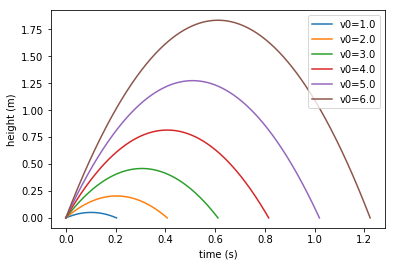

In [9]:
%pylab inline
from ipywidgets import widgets
from IPython.display import display, clear_output

g=9.81

n=50 # number of points to be plotted for each curve

# Let the user enter v0 values
def plot_functions(sender):

    try:
        v0_strings = sender.value.split(",")
        v0_list = [float(v0_string) for v0_string in v0_strings]
    except:
        print("ERROR: invalid input, expects a series of numbers separated by a ','")
        return 1
    
    n_curves = len(v0_list)
    v0 = array(v0_list)

    t=zeros((n_curves,n))
    y=zeros((n_curves,n))
    for xx in range(n_curves):
        t[xx]=linspace(0,2*v0[xx]/g,n) # generate n points between 0 and 2*v0/g
        y[xx]=v0[xx]*t[xx] - 0.5*g*t[xx]**2
    
    # plot graph
    for i in range(n_curves):
        ll='v0='+str(v0[i]) # text for curve label in legend
        plt=plot(t[i],y[i],label=ll)

    legend()
    xlabel('time (s)')
    ylabel('height (m)')
    show()


widget_plot = widgets.Text()
widget_plot.on_submit(plot_functions)
display(widget_plot)

* **Plot another formula**</br>
The function</br></br>
$f(x, t) = \exp(-(x - 3t)^2)\sin(3\pi(x - t))$
</br></br>
describes, for a fixed value of *t*, a wave localized in space. Make a program that visualizes this function as a function of *x* on the interval [−4, 4] when *t* = 0.

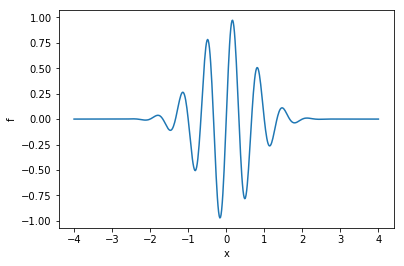

In [10]:
from pylab import *

def f(x,t):
    return exp(-(x-3*t)**2)*sin(3*pi*(x-t))

n=500 # number of points to be plotted on the graph
x=linspace(-4.,4.,n) 
y=f(x,0.0)

# plot graph
plot(x,y)
xlabel('x')
ylabel('f')
show()

* **Implement matrix-vector multiplication**<br />
A matrix $\mathbf{A}$ and a vector $\mathbf{b}$, represented in Python as a 2D array and a 1D array respectively, are given by:

$$
\mathbf{A} = \left\lbrack\begin{array}{ccc}
0 & 12 & -1\cr
-1 & -1 & -1\cr
11 & 5 & 5
\end{array}\right\rbrack
$$

$$
\mathbf{b} = \left\lbrack\begin{array}{c}
-2\cr
1\cr
7
\end{array}\right\rbrack
$$

Multiplying a matrix by a vector results in another vector $\mathbf{c}$, whose components are defined by the general rule

$$\mathbf{c}_i = \sum_j\mathbf{A}_{i,j}\mathbf{b}_j$$

Define $\mathbf{A}$ and $\mathbf{b}$ as NumPy arrays, and multiply them together using the above rule.

In [11]:
from numpy import *
A = array([[0, 12, -1], [-1, -1, -1], [11, 5, 5]])
b = array([-2, 1, 7])

if A.shape[0] != A.shape[1] or A.shape[0] != b.shape[0]:
    raise RunTimeError("A should be square and b a vector of the same size as A")

c = zeros(b.shape[0])
for i in range(0, b.shape[0]):
    s = 0 # s holds the sum of A[i][j]*b[j] over the index j
    for j in range(0, b.shape[0]):
        s += A[i][j]*b[j]
    c[i] = s
    
print("The vector c = ", c)

The vector c =  [  5.  -6.  18.]


* **Plot meteorological data** <br />
The file data/precipitation.csv contains monthly precipitation data for South-East England between 1916 and 2016 provided by the [Met Office](https://www.metoffice.gov.uk/hadobs/hadukp/data/download.html). Each row represents a year, and each column a month.
To open the data file, use the command below:

```python
import numpy as np
data = np.loadtxt(fname='data/precipitation.csv', delimiter=',')
```

 - Open the data file, and print its content. Observe that it is a multi-dimensional Numpy array. Print its shape. How many years are represented ?

In [12]:
%pylab inline

data = loadtxt(fname='data/precipitation.csv', delimiter=',')

print(data)
print("shape: ", data.shape)

Populating the interactive namespace from numpy and matplotlib
[[  37.5  106.6  110.7 ...,  107.6  106.7   87.9]
 [  37.3   27.6   50.2 ...,  107.4   31.1   32.9]
 [  77.5   30.3   24.2 ...,   40.3   57.8   65.3]
 ..., 
 [ 181.9  130.3   38.7 ...,  108.5  135.3   55.8]
 [  93.1   56.    26.8 ...,   54.    75.2   70.2]
 [ 114.1   49.1   79.7 ...,   28.7   94.9   17.4]]
shape:  (101, 12)


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


 - Write a function that converts a length in mm into a length in inches. Use this function to convert the precipitation data into inches in a vectorized way.

In [13]:
def mm_to_inches(x):
    return x/25.4

data = mm_to_inches(data)

 
 - With a `for` loop, print (in a formatted way) for each month, the year where the monthly precipitation was the highest. A line like 
`The maximal precipitation for January is 181.9 mm/month and was in 2014.` 
is expected.
Hint: you should use the [max]() and [argmax]() functions provided by Numpy.

In [14]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
for month in range(data.shape[1]-1):
    data_month = data[:,month]
    max_precip = amax(data_month)
    year = argmax(data_month)
    print("The maximal precipitation for %s is %.1f inches/month and was in %d" % (months[month], max_precip, year+1916))

The maximal precipitation for January is 7.2 inches/month and was in 2014
The maximal precipitation for February is 5.4 inches/month and was in 1951
The maximal precipitation for March is 5.9 inches/month and was in 1947
The maximal precipitation for April is 5.7 inches/month and was in 2000
The maximal precipitation for May is 4.7 inches/month and was in 1932
The maximal precipitation for June is 5.3 inches/month and was in 1971
The maximal precipitation for July is 4.6 inches/month and was in 1920
The maximal precipitation for August is 5.3 inches/month and was in 1917
The maximal precipitation for September is 6.5 inches/month and was in 1974
The maximal precipitation for October is 7.8 inches/month and was in 1987
The maximal precipitation for November is 8.0 inches/month and was in 1940


 - Plot the [average](), [maximal]() and [minimal]() monthly precipitation with respect to the year. Don't forget to decorate the plot properly (add a plot title, legends and axis labels).
 

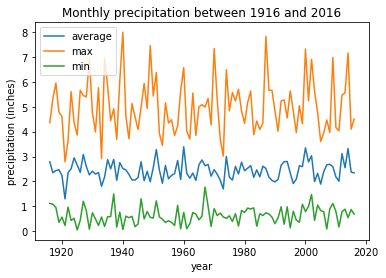

In [15]:
avg_data = mean(data, axis=1)
max_data = amax(data, axis=1)
min_data = amin(data, axis=1)

number_years = data.shape[0]
years = linspace(1916, 2016, number_years)

plot(years, avg_data, years, max_data, years, min_data)
legend(("average", "max", "min"), loc='best')
title("Monthly precipitation between 1916 and 2016")
xlabel("year")
ylabel("precipitation (inches)")
show()

 - Plot the same quantities, but only for the last twenty years.
 

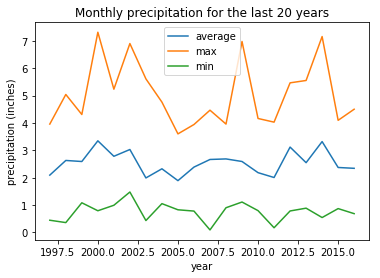

In [16]:
plot(years[-20:], avg_data[-20:], years[-20:], max_data[-20:], years[-20:], min_data[-20:])
legend(("average", "max", "min"), loc='best')
title("Monthly precipitation for the last 20 years")
xlabel("year")
ylabel("precipitation (inches)")
show()

 - Plot the same quantities, but only for years ending in 6.

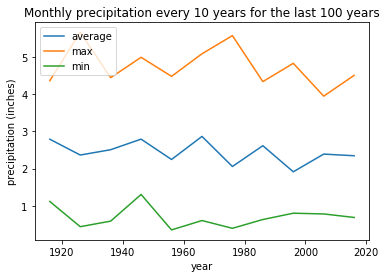

In [17]:
plot(years[::10], avg_data[::10], years[::10], max_data[::10], years[::10], min_data[::10])
legend(("average", "max", "min"), loc='best')
title("Monthly precipitation every 10 years for the last 100 years")
xlabel("year")
ylabel("precipitation (inches)")
show()